Exploring Predictors of Fetal Health Outcomes

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

fetal_health = pd.read_csv('/Users/rudeciabernard/Downloads/fetal_health.csv')


Exploratory Data Analysis

<Axes: >

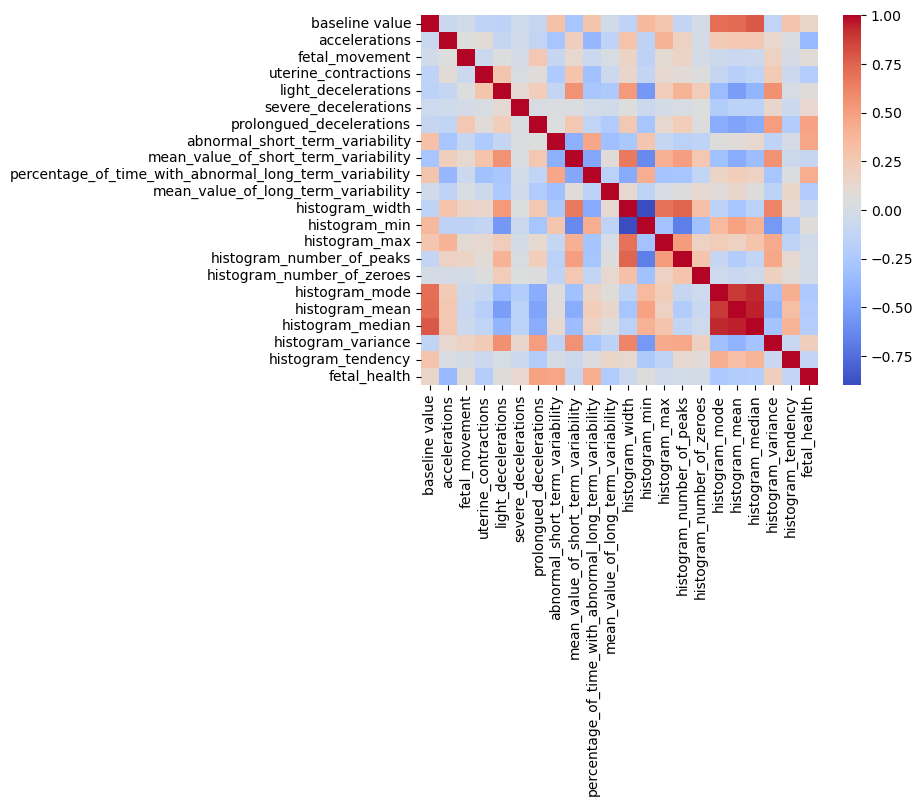

In [26]:
correlation_matrix  = fetal_health.corr()


sns.heatmap(correlation_matrix, cmap = 'coolwarm')

In [22]:
fh_r_vals = correlation_matrix.iloc[21, :].sort_values(ascending = False)

print(fh_r_vals)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

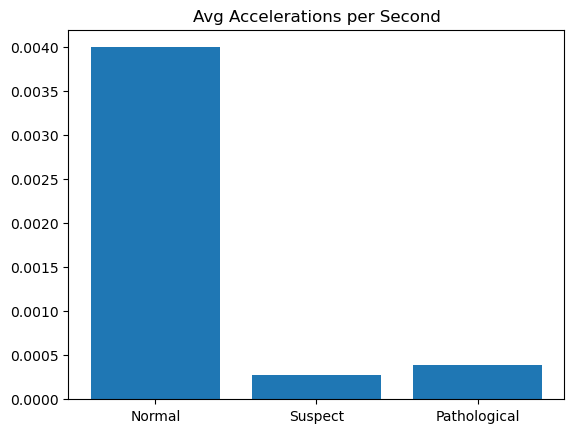

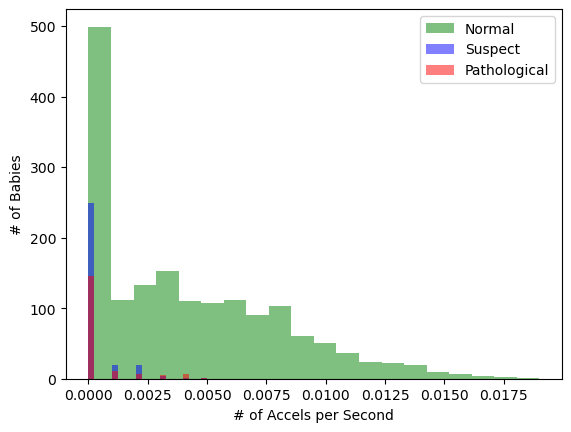

In [ ]:
states = ['Normal', 'Suspect', 'Pathological']
fh_group_data = fetal_health.groupby(by = 'fetal_health').mean().reset_index()



plt.bar(x = fh_group_data['fetal_health'], height= fh_group_data['accelerations'], tick_label = states)
plt.title('Avg Accelerations per Second')
plt.show()


plt.hist(fetal_health.groupby(by = 'fetal_health').get_group(1)['accelerations'], color = 'green', label= 'Normal', alpha = 0.5, bins = 20)
plt.hist(fetal_health.groupby(by = 'fetal_health').get_group(2)['accelerations'], color = 'blue', label= 'Suspect', alpha = 0.5, bins = 20)
plt.hist(fetal_health.groupby(by = 'fetal_health').get_group(3)['accelerations'], color = 'red', label= 'Pathological', alpha = 0.5, bins = 20)
plt.legend()
plt.title('Accelerations in HR by Group')
plt.xlabel('# of Accels per Second')
plt.ylabel('# of Babies')


plt.show()

#1 nprm 2 sus 3 path


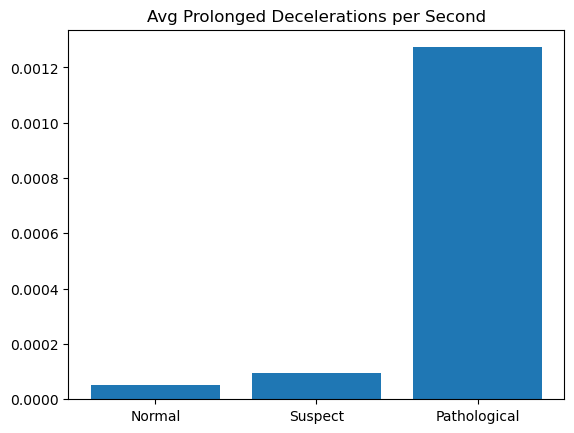

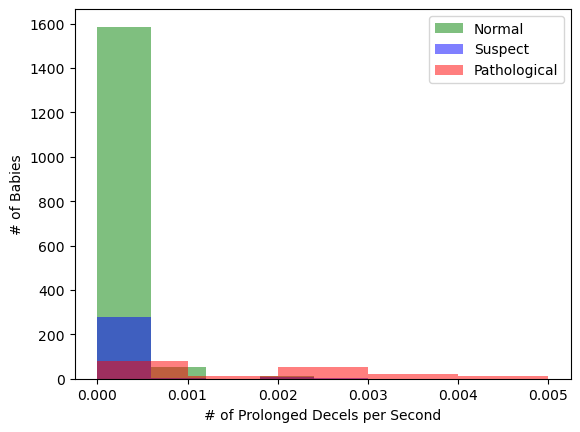

In [40]:
plt.bar(x = fh_group_data['fetal_health'], height= fh_group_data['prolongued_decelerations'], tick_label = states)
plt.title('Avg Prolonged Decelerations per Second')
plt.show()



plt.hist(fetal_health.groupby(by = 'fetal_health').get_group(1)['prolongued_decelerations'], color = 'green', label= 'Normal', alpha = 0.5, bins = 5)
plt.hist(fetal_health.groupby(by = 'fetal_health').get_group(2)['prolongued_decelerations'], color = 'blue', label= 'Suspect', alpha = 0.5, bins = 5)
plt.hist(fetal_health.groupby(by = 'fetal_health').get_group(3)['prolongued_decelerations'], color = 'red', label= 'Pathological', alpha = 0.5, bins = 5)
plt.legend()
plt.title('Prolonged Decelerations in HR by Group')
plt.xlabel('# of Prolonged Decels per Second')
plt.ylabel('# of Babies')
plt.show()

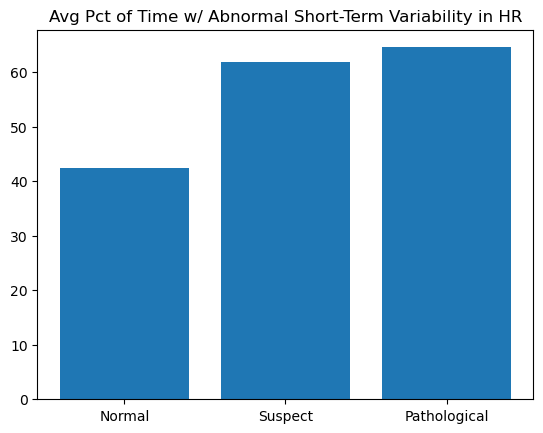

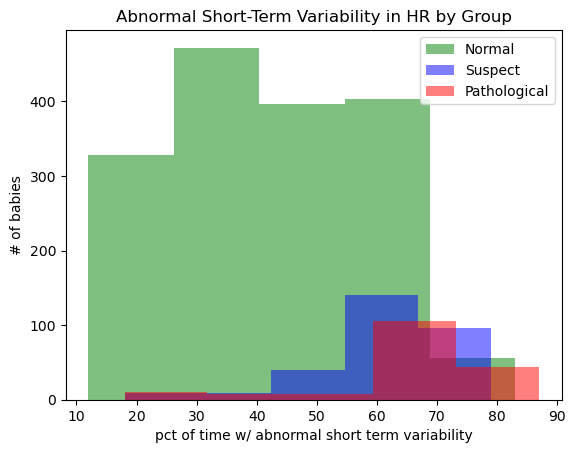

In [42]:
plt.bar(x = fh_group_data['fetal_health'], height= fh_group_data['abnormal_short_term_variability'], tick_label = states)
plt.title('Avg Pct of Time w/ Abnormal Short-Term Variability in HR')
plt.show()


plt.hist(fetal_health.groupby(by = 'fetal_health').get_group(1)['abnormal_short_term_variability'], color = 'green', label= 'Normal', alpha = 0.5, bins = 5)
plt.hist(fetal_health.groupby(by = 'fetal_health').get_group(2)['abnormal_short_term_variability'], color = 'blue', label= 'Suspect', alpha = 0.5, bins = 5)
plt.hist(fetal_health.groupby(by = 'fetal_health').get_group(3)['abnormal_short_term_variability'], color = 'red', label= 'Pathological', alpha = 0.5, bins = 5)
plt.legend()
plt.title('Abnormal Short-Term Variability in HR by Group')
plt.xlabel('pct of time w/ abnormal short term variability')
plt.ylabel('# of babies')
plt.show()


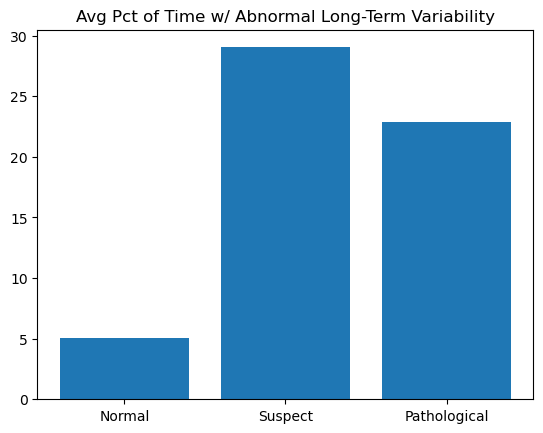

In [19]:
plt.bar(x = fh_group_data['fetal_health'], height= fh_group_data['percentage_of_time_with_abnormal_long_term_variability'], tick_label = states)
plt.title('Avg Pct of Time w/ Abnormal Long-Term Variability')
plt.show()

Modeling Fetal Health With Tree Models

In [20]:
#Decision Tree Classifier
X = fetal_health.drop(['fetal_health'], axis= 1).copy()
y = fetal_health[['fetal_health']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 33, shuffle= True, train_size= 0.75)


dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)


print(f'decision tree rmse is {root_mean_squared_error(y_test, dtc.predict(X_test))}')
print(f'decision tree accuracy is {accuracy_score(y_test, dtc.predict(X_test))}')
print(f'decision tree r2 score is {r2_score(y_test, dtc.predict(X_test))}')
print(f'decision tree max depth is {dtc.tree_.max_depth}')


decision tree rmse is 0.2564945880212885
decision tree accuracy is 0.9454887218045113
decision tree r2 score is 0.8073819671452808
decision tree max depth is 14


In [ ]:
#Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

print(f'random forest rmse is {root_mean_squared_error(y_test, rfc.predict(X_test))}')
print(f'random forest accuracy is {accuracy_score(y_test, rfc.predict(X_test))}')
print(f'random forest r2 score is {r2_score(y_test, rfc.predict(X_test))}')



random forest rmse is 0.2564945880212885
random forest accuracy is 0.9454887218045113
random forest r2 score is 0.8073819671452808
